In [2]:
!pip install tensorflow==2.4.1
!pip install gpustat
import numpy as np
import tensorflow as tf
from keras.utils.np_utils import to_categorical
import time

In [ ]:
# data normalization

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train = x_train - np.mean(x_train)
x_test = x_test - np.mean(x_test)


# reshape
x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))
print(x_train[100])
print(y_test.shape)
print(y_train[10])

In [ ]:
class MLP_1():

    def __init__(self, sizes, epochs=500, l_rate=0.0001):
          self.sizes = sizes
          self.epochs = epochs
          self.l_rate = l_rate
          # we save all parameters in the neural network in this dictionary
          self.params = self.initialization()

    def softmax(self, x, derivative=False):
        # Numerically stable with large exponentials
        exps = np.exp(x - x.max())
        if derivative:
            return exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))
        return exps / np.sum(exps, axis=0)

    def initialization(self):
        # number of nodes in each layer
        input_layer = self.sizes[0]
        hidden_1 = self.sizes[1]
        output_layer = self.sizes[2]

        params = {
            'W1': np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1),
            'W2': np.random.randn(output_layer, hidden_1) * np.sqrt(1. / output_layer)
        }

        return params

    def forward_pass(self, x_train):
        params = self.params

        # input layer activations becomes sample
        params['A0'] = x_train

        # input layer to hidden layer 1
        params['Z1'] = np.dot(params["W1"], params['A0'])
        params['A1'] = self.ReLU(params['Z1'])
        # hidden layer 1 to hidden layer 2
        params['Z2'] = np.dot(params["W2"], params['A1'])
        params['A2'] = self.softmax(params['Z2'])


        return params['A2']

    def backward_pass(self, y_train, output):

        params = self.params
        change_w = {}

        # Calculate W2 update
        error = 2 * (output - y_train) / output.shape[0] * self.softmax(params['Z2'], derivative=True)
        change_w['W2'] = np.outer(error, params['A1'])
        # Calculate W1 update
        error = np.dot(params['W2'].T, error) * self.ReLU(params['Z1'], derivative=True)
        change_w['W1'] = np.outer(error, params['A0'])

        return change_w

    def update_network_parameters(self, changes_to_w):

        for key, value in changes_to_w.items():
            self.params[key] -= self.l_rate * value

    def compute_accuracy(self, x_val, y_val):
      
        predictions = []

        for x, y in zip(x_val, y_val):
            output = self.forward_pass(x)
            pred = np.argmax(output)
            predictions.append(pred == np.argmax(y))

        return np.mean(predictions)

    def train(self, x_train, y_train, x_val, y_val):
        start_time = time.time()
        for iteration in range(self.epochs):
            for x, y in zip(x_train, y_train):
                output = self.forward_pass(x)
                changes_to_w = self.backward_pass(y, output)
                self.update_network_parameters(changes_to_w)

            accuracy = self.compute_accuracy(x_val, y_val)
            print('Epoch: {0}, Time Spent: {1:.2f}s, Accuracy: {2:.2f}%'.format(
                iteration + 1, time.time() - start_time, accuracy * 100
            ))
    def ReLU(self, x, derivative = False):
            if derivative:
              y = x
              y[y <= 0] = 0
              y[y > 0] = 1
              return y
            x[x <= 0] = 0
            return x

  

In [ ]:
mlp1 = MLP_1(sizes=[784,128,10])
mlp1.train(x_train,y_train,x_test,y_test)

Epoch: 1, Time Spent: 36.36s, Accuracy: 14.64%
Epoch: 2, Time Spent: 73.39s, Accuracy: 23.72%
Epoch: 3, Time Spent: 110.28s, Accuracy: 33.14%
Epoch: 4, Time Spent: 147.02s, Accuracy: 43.79%
Epoch: 5, Time Spent: 184.25s, Accuracy: 53.58%
Epoch: 6, Time Spent: 220.79s, Accuracy: 60.62%
Epoch: 7, Time Spent: 257.69s, Accuracy: 65.64%
Epoch: 8, Time Spent: 294.65s, Accuracy: 70.56%
Epoch: 9, Time Spent: 331.22s, Accuracy: 73.52%
Epoch: 10, Time Spent: 367.97s, Accuracy: 75.57%
Epoch: 11, Time Spent: 403.96s, Accuracy: 77.36%
Epoch: 12, Time Spent: 440.29s, Accuracy: 79.24%
Epoch: 13, Time Spent: 477.53s, Accuracy: 80.35%
Epoch: 14, Time Spent: 514.34s, Accuracy: 81.16%
Epoch: 15, Time Spent: 550.37s, Accuracy: 82.06%
Epoch: 16, Time Spent: 587.25s, Accuracy: 82.87%
Epoch: 17, Time Spent: 624.17s, Accuracy: 83.61%
Epoch: 18, Time Spent: 660.78s, Accuracy: 84.23%
Epoch: 19, Time Spent: 697.99s, Accuracy: 84.80%
Epoch: 20, Time Spent: 735.14s, Accuracy: 85.28%
Epoch: 21, Time Spent: 771.79s,

## creativity
### 3 layers with RELU

In [ ]:
class MLP_3():

  # initialization
  def __init__(self, sizes, epochs=100, l_rate=0.001):
      self.sizes = sizes
      self.epochs = epochs
      self.l_rate = l_rate
      self.params = self.initialization()

  def softmax(self, x, derivative=False):
          exps = np.exp(x - x.max())
          if derivative:
              return exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))
          return exps / np.sum(exps, axis=0)

  def sigmoid(self, x, derivative=False):
          if derivative:
              return (np.exp(-x))/((np.exp(-x)+1)**2)
          return 1/(1 + np.exp(-x))

  def ReLU(self, x, derivative = False):
        if derivative:
          y = x
          y[y <= 0] = 0
          y[y > 0] = 1
          return y
        x[x <= 0] = 0
        return x


  # with one hidden layer
  def initialization(self):
          # number of nodes in each layer
        input_layer=self.sizes[0]
        hidden_1=self.sizes[1]
        hidden_2=self.sizes[2]
        hidden_3=self.sizes[3]
        output_layer=self.sizes[4]

        params = {
            'W0':np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1),
            'W1':np.random.randn(hidden_2, hidden_1) * np.sqrt(1. / hidden_2),
            'W2':np.random.randn(hidden_3, hidden_2) * np.sqrt(1. / hidden_3),
            'W3':np.random.randn(output_layer, hidden_3) * np.sqrt(1. / output_layer)
        }

        return params


  def forward(self, x_train):
        params = self.params
        params['A0'] = x_train
        # from input layer to hidden layer1
        params['A1']=np.dot(params['W0'], params['A0'])
        params['S1'] =self.ReLU(params['A1'])

        # hidden layer1 to hidden layer2
        params['A2'] = np.dot(params["W1"], params['S1'])
        params['S2'] = self.ReLU(params['A2'])

        # hidden layer 2 to hidden layer 3
        params['A3'] = np.dot(params["W2"], params['S2'])
        params['S3'] = self.ReLU(params['A3'])

        # hidden layer 3 to output layer
        params['A4'] = np.dot(params['W3'], params['S3'])
        params['S4'] = self.softmax(params['A4'])
        return params['S4']

  def backward(self, y_train, output):
        params = self.params
        changes_to_w = {}

        # calculate W4 update
        error = 2 * (output - y_train) / output.shape[0] * self.softmax(params['A4'], derivative=True)
        changes_to_w['W3'] = np.outer(error, params['S3'])

        # Calculate W3 update
        error = np.dot(params['W3'].T, error) * self.ReLU(params['A3'], derivative=True)
        changes_to_w['W2'] = np.outer(error, params['S2'])

        # Calculate W1 update
        error = np.dot(params['W2'].T, error) * self.ReLU(params['A2'],derivative=True)
        changes_to_w['W1'] = np.outer(error, params['S1'])

        # Calculate W0 update
        error = np.dot(params['W1'].T, error) * self.ReLU(params['A1'],derivative=True)
        changes_to_w['W0'] = np.outer(error, params['A0'])

        return changes_to_w

  def update_network_parameters(self, changes_to_w):        
          for key, value in changes_to_w.items():
              self.params[key] -= self.l_rate * value

  def train(self, x_train, y_train, x_val, y_val):
          start_time = time.time()
          for iteration in range(self.epochs):
              for x,y in zip(x_train, y_train):
                  output = self.forward(x)
                  changes_to_w = self.backward(y, output)
                  self.update_network_parameters(changes_to_w)
              
              accuracy = self.evaluate_acc(x_val, y_val)
              print('Epoch: {0}, Time Spent: {1:.2f}s, Accuracy: {2:.2f}%'.format(
                  iteration+1, time.time() - start_time, accuracy * 100
              ))
  def evaluate_acc(self, x_val, y_val):
          predictions = []

          for x, y in zip(x_val, y_val):
              output = self.forward(x)
              pred = np.argmax(output)
              predictions.append(pred == np.argmax(y))
          
          return np.mean(predictions)

In [ ]:
mlp3 = MLP_3(sizes=[784,128,128,128,10])
mlp3.train(x_train,y_train,x_test,y_test)

Epoch: 1, Time Spent: 66.19s, Accuracy: 79.25%
Epoch: 2, Time Spent: 127.33s, Accuracy: 85.21%
Epoch: 3, Time Spent: 188.33s, Accuracy: 88.16%
Epoch: 4, Time Spent: 249.50s, Accuracy: 89.36%
Epoch: 5, Time Spent: 310.59s, Accuracy: 90.22%
Epoch: 6, Time Spent: 372.17s, Accuracy: 90.81%
Epoch: 7, Time Spent: 433.54s, Accuracy: 91.15%
Epoch: 8, Time Spent: 494.53s, Accuracy: 91.54%
Epoch: 9, Time Spent: 555.55s, Accuracy: 91.78%
Epoch: 10, Time Spent: 618.79s, Accuracy: 91.98%
Epoch: 11, Time Spent: 681.04s, Accuracy: 92.17%
Epoch: 12, Time Spent: 742.72s, Accuracy: 92.42%
Epoch: 13, Time Spent: 804.49s, Accuracy: 92.61%
Epoch: 14, Time Spent: 866.25s, Accuracy: 92.74%
Epoch: 15, Time Spent: 927.72s, Accuracy: 92.92%
Epoch: 16, Time Spent: 989.70s, Accuracy: 93.14%
Epoch: 17, Time Spent: 1051.68s, Accuracy: 93.38%
Epoch: 18, Time Spent: 1112.96s, Accuracy: 93.46%
Epoch: 19, Time Spent: 1171.19s, Accuracy: 93.67%
Epoch: 20, Time Spent: 1229.26s, Accuracy: 93.74%
Epoch: 21, Time Spent: 128

In [ ]:
pip install matplotlib

[0.146, 0.237, 0.331, 0.438, 0.536, 0.606, 0.656, 0.706, 0.735, 0.756, 0.774, 0.792, 0.803, 0.812, 0.821, 0.829, 0.836, 0.842, 0.848, 0.853, 0.856, 0.859, 0.862, 0.864, 0.867, 0.87, 0.872, 0.874, 0.876, 0.878, 0.879, 0.88, 0.881, 0.883, 0.884, 0.886, 0.887, 0.889, 0.89, 0.892, 0.893, 0.894, 0.895, 0.895, 0.896, 0.897, 0.898, 0.898, 0.899, 0.9, 0.901, 0.902, 0.902, 0.903, 0.903, 0.903, 0.904, 0.904, 0.905, 0.906, 0.907, 0.907, 0.908, 0.909, 0.909, 0.909, 0.91, 0.91, 0.91, 0.911, 0.911, 0.911, 0.912, 0.912, 0.912, 0.912, 0.913, 0.913, 0.913, 0.913, 0.913, 0.914, 0.915, 0.915, 0.915, 0.916, 0.916, 0.917, 0.917, 0.917, 0.917, 0.917, 0.918, 0.918, 0.918, 0.918, 0.918, 0.918, 0.918, 0.919]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,

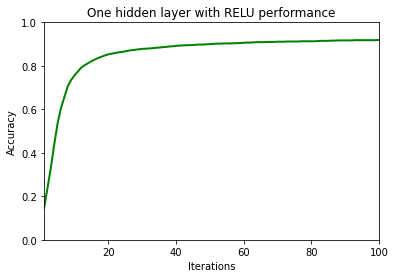

In [ ]:
import matplotlib.pyplot as plt
import xlwt
import os

with open('h1_relu_performance.txt','r+') as fd:
  e = list(range(1,101))
  p = []
  #read all accuracy from the performance report
  for text in fd.readlines():
    y=text.split(':')[3].strip("\n").strip('%').strip()
    p.append(y.split("\n"))

  p = list(np.concatenate(p).flat)
  p = [round(float(i)/100,3) for i in p]
  print(p)
  print(e)

fd.close()

plt.plot(e, p, color='green',  linewidth = 2)
  
# setting x and y axis range
plt.ylim(0,1)
plt.xlim(1,100)
  
# naming the x axis
plt.xlabel('Iterations')
# naming the y axis
plt.ylabel('Accuracy')
  
# giving a title to my graph
plt.title('One hidden layer with RELU performance')
  
# function to show the plot
plt.show()

